# **<center>Welcome to our first Kernel</center>**
### <center>Please Vote If you like our Kernel and share your Feedback</center> <img  src="https://raw.githubusercontent.com/ABSphreak/ABSphreak/master/gifs/Hi.gif" width="50px">

# **<h1 align ="middle"><b> Netflix Recommender, Netflix Exploratory Data Analysis </b></h1>**

# 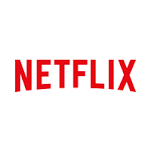

### Netflix, Inc. is an American over-the-top content platform and production company headquartered in Los Gatos, California. Netflix was founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California.

### **The company's primary business is a subscription-based streaming service offering online streaming from a library of films and television series, including those produced in-house.**


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd  #pandas to load datasets
import numpy as np  #numpy for linear algebra
import matplotlib.pyplot as plt  #matplotlib for making plots
import seaborn as sns  #seaborn for making plots

<p>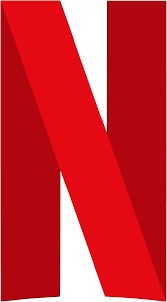</p>

### **<h1 align ="middle"><b> NETFLIX RECOMMENDER SYSTEM </b></h1>**

### **Recommender systems try to automate aspects of a completely different information discovery model where people try to find other people with similar tastes and then ask them to suggest new things.**

In [ ]:
netflix_dataset = pd.read_csv("../input/netflix-shows/netflix_titles.csv")
netflix_dataset.head()

In [ ]:
netflix_dataset.count()

# **<center>Content-Based Recommendation System</center>**

## <center><u>Content-Based Filtering</u></center>


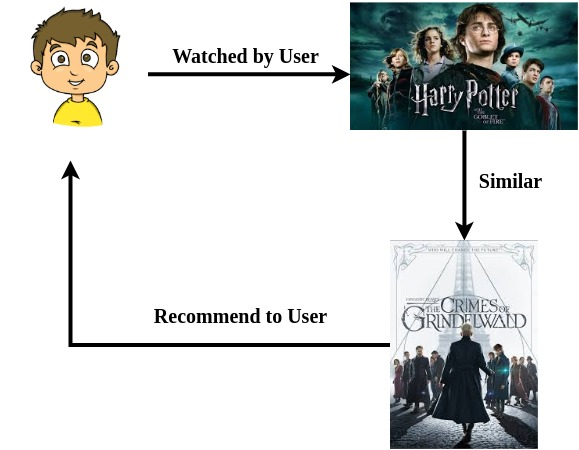

### **A content-based recommender works with data that the user provides, either explicitly (rating) or implicitly (clicking on a link). Based on that data, a user profile is generated, which is then used to make suggestions to the user.**

#### **Filling NaN values with empty String ' '**

In [ ]:
fill_netflix_dataset = netflix_dataset.fillna(' ')
fill_netflix_dataset.head()

### **Term Frequency(TF) and Inverse Document Frequency(IDF)**

**Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

**TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)**


**Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However, it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scaling up the rare ones, by computing the following:

**IDF(t) = log_e(Total number of documents / Number of documents with term t in it)**

**TF-IDF** is used mainly because, Suppose we search for "the fundamental of DataScience" on Google. It is certain that "the" will occur more frequently than "DataScience" but the relative importance of "DataScience" is higher than "the" search query point of view.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Removing stop words 
tf_idf = TfidfVectorizer(stop_words='english')

#Constructing TF-IDF matrix by transforming and fitting the data
tf_idf_matrix = tf_idf.fit_transform(fill_netflix_dataset['description'])

# shape of tf_idf_matrix
tf_idf_matrix.shape

16151 words describing 6234 movies in the Netflix dataset

### **Cosine Similarity**

Cosine Similarity is used to calculate the numeric value that denotes the similarity between the two movies.

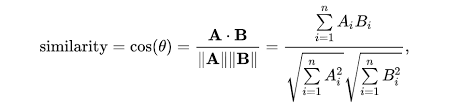


Now, we have used the TF-IDF Vectorizer, calculating the Dot product will directly give us the Cosine Similarity Score. Therefore, we will use **sklearn's linear_kernel** instead of cosine similarity since it calculate it much faster.

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
# calculating the Cosine Similarity Score

cosine_sim_score = linear_kernel(tf_idf_matrix, tf_idf_matrix)

In [ ]:
cosine_sim_score[0]

Now, we have a cosine similarity score matrix for all the movies in our Dataset.

In [ ]:
netflix_index = netflix_dataset.index
titles = netflix_dataset['title']
indices = pd.Series(netflix_index, index = titles).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim = cosine_sim_score):
    
    idx = indices[title]
    
    # Get the pairwise similarity scores of all movies with that movies
    sim_scores = list(enumerate(cosine_sim_score[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # Get the Movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 Similar movies
    return netflix_dataset['title'].iloc[movie_indices]

In [ ]:
get_recommendations('Mortel')

In [ ]:
get_recommendations('PK')

In [ ]:
get_recommendations('Friends')

It is seen that the model performs well, but it is not accurate recommendations. This is not of much use to most people as we don't take into considerations very important features such as cast, title, director, and l, which determine the rating and the popularity of a movie.

Therefore, we going to use much more suggestive features than Tagline or titles.

In the next subblocks, we will build a more sophisticated Recommender System that takes title, description, listed_in, cast, and director into consideration.

In [ ]:
fill_netflix_dataset.head(2)

In [ ]:
def clean_data(x):
    return str.lower(x.replace(' ', ''))

Identifying features on which the model is to be filtered

In [ ]:
features = ['title', 'director', 'cast', 'listed_in', 'description']
fill_netflix_dataset = fill_netflix_dataset[features]

In [ ]:
for feature in features:
    fill_netflix_dataset[feature] = fill_netflix_dataset[feature].apply(clean_data)
    
fill_netflix_dataset.head(2)

In [ ]:
def create_soup(x):
    return x['title'] + ' ' + x['director'] + ' ' + x['cast'] + ' ' + x['listed_in'] +' ' + x['description']

In [ ]:
fill_netflix_dataset['soup'] = fill_netflix_dataset.apply(create_soup, axis = 1)

Now, we are going to create our updated version of the Recommender function as same as the last one

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(fill_netflix_dataset['soup'])

cosine_sim_score2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
fill_netflix_dataset = fill_netflix_dataset.reset_index()
indices = pd.Series(fill_netflix_dataset.index, index = fill_netflix_dataset['title'])

In [ ]:
def updated_recommendations(title, cosine_sim = cosine_sim_score2):
    
    title = title.replace(' ', '').lower()
    idx = indices[title]
    
    # Get the pairwise similarity scores of all movies with that movies
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # Get the Movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 Similar movies
    return netflix_dataset['title'].iloc[movie_indices]

In [ ]:
updated_recommendations('PK')

In [ ]:
updated_recommendations('The Hook Up Plan')

In [ ]:
updated_recommendations('Kiss me first')

In [ ]:
updated_recommendations('Friends')

### **<h1 align ="middle"><b> Analyzing Datasets through Various PLOTS for Various Information </b></h1>**

### **Which content is more Available on NETFLIX ?** MOVIES or TV-SHOWS

In [ ]:
# creating Countplot from Seaborn to show max available content in NETFLIX

sns.set_style('dark')
ax = plt.subplots(figsize = (6, 6))
plt.title('Countplot for Netflix Movies and TV-Shows', fontweight='bold')
ax = sns.countplot(x = 'type', data=netflix_dataset, palette='Set1')

Hence, This plot shows NETFLIX has more **MOVIES** content instead of TV-SHOWS. 

### **Which month is a better option to release new Content in 2020?** 

This question is mainly based on distributors focused and their promotion strategy but at some point, this might be also depending on the no of new content added/ release in a month. If there is less content added in a month then more audiences going to watch that content and this increases the chances to succeed that content.

**Hence, adding new content in a month or less no new content added/ release will help the content to be more successful.**

In [ ]:
#creating heatmap to analyse least releasing month content

#fetching value of month and year from dataset to plot heatmap

#month is available in 'dateadded' coulumn in dataset (format 'month date, year')
#For fetching month we doing splitting in 'dateadded' column through whole dataset so we take dateadded coloum out from dataset

net_date = netflix_dataset[['date_added']].dropna()

net_date['Year'] = net_date.date_added.apply(lambda y : y.split(' ')[-1])
net_date['Month'] = net_date.date_added.apply(lambda y : y.split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df = net_date.groupby('Year')['Month'].value_counts().unstack().fillna(0)[month_order].T


ax = plt.subplots(figsize = (15, 6), dpi=100)
ax = sns.heatmap(df, cmap="YlGnBu", linewidths=.1)

August and September may be the best time to launch any new content in 2020 with respect to 2019.

### **In which Year Maximum Movies and TV-Shows are released ?** 

In [ ]:
ax = plt.subplots(figsize = (10, 8))
sns.set_style('dark')
plt.title('Netflix Movie and TV-Shows Releasing', fontweight='bold', fontsize=20)
ax = sns.countplot(y = 'release_year', data = netflix_dataset, order = netflix_dataset['release_year'].value_counts().index[0:15], palette='Set2')

This visualization shows that 2018 is the maximum releasing year for Netflix.

### **Dividing Netflix Dataset into two parts Movies and TV-Shows** 

In [ ]:
netflix_movies = netflix_dataset[netflix_dataset['type'] == 'Movie']
netflix_movies.head()

In [ ]:
netflix_tvshows = netflix_dataset[netflix_dataset['type'] == 'TV Show']
netflix_tvshows.head()

### **Movies and TV-Shows rating Analysis** 

In [ ]:
ax = plt.subplots(figsize = (10, 8))
sns.set_style('dark')
plt.title('Netflix Movie Rating', fontweight='bold', fontsize=20)
ax = sns.countplot(x = 'rating', data = netflix_movies, palette = 'Set2', order = netflix_movies['rating'].value_counts().index[0:15])

In [ ]:
ax = plt.subplots(figsize = (10, 8))
sns.set_style('dark')
plt.title('Netflix TV-Shows Rating', fontweight = 'bold', fontsize=20)
ax = sns.countplot(x = 'rating', data = netflix_tvshows, palette='Set2', order = netflix_tvshows['rating'].value_counts().index[0:15])

Largest Rating in Movies and TV-Shows is of 'TV-MA', according to the TV Parental Guidelines website, means “This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.

### **Movies and TV-Shows content creating Countries** 

In [ ]:
# More movies content creating countries

countries = {}
netflix_movies['country'] = netflix_movies['country'].fillna('Unknown')

list_countries = list(netflix_movies['country'])

for i in list_countries:
    i = list(i.split(','))
    
    if len(i) is 1:
        if i in list(countries.keys()):
            countries[i] += 1
        else:
            countries[i[0]] = 1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j] += 1
            else:
                countries[j] = 1

In [ ]:
final_countries = {}

for country, no in countries.items():
    country = country.replace(' ','')
    
    if country in list(final_countries.keys()):
        final_countries[country] += no
    else:
        final_countries[country] = no
        
final_countries = {k : v for k, v in sorted(final_countries.items(), key = lambda item : item[1], reverse = True)}

In [ ]:
plt.figure(figsize = (15, 15))
plt.title('Movie Content Creating Countries', fontweight = 'bold', fontsize=15)

y_ver = list(final_countries.keys())
x_hor = list(final_countries.values())
sns.barplot( y = y_ver[0:40], x = x_hor[0:40])
plt.ylabel('Arrival delays (in minutes)')


United State is the most Movie conent creating country.

In [ ]:
# More TV-Shows content creating countries

countries = {}
netflix_tvshows['country'] = netflix_tvshows['country'].fillna('Unknown')

list_countries = list(netflix_tvshows['country'])

for i in list_countries:
    i = list(i.split(','))
    
    if len(i) is 1:
        if i in list(countries.keys()):
            countries[i] += 1
        else:
            countries[i[0]] = 1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j] += 1
            else:
                countries[j] = 1

In [ ]:
final_countries = {}

for country, no in countries.items():
    country = country.replace(' ','')
    
    if country in list(final_countries.keys()):
        final_countries[country] += no
    else:
        final_countries[country] = no
        
final_countries = {k : v for k, v in sorted(final_countries.items(), key = lambda item : item[1], reverse = True)}

In [ ]:
plt.figure(figsize = (15, 15))
plt.title('TV-Shows Content Creating Countries', fontweight = 'bold', fontsize=15)

y_ver = list(final_countries.keys())
x_hor = list(final_countries.values())
sns.barplot( y = y_ver[0:40], x = x_hor[0:40])
plt.ylabel('Arrival delays (in minutes)')

United State is the most TV-Shows conent creating country.

### **Genres WordClouds for Movies and TV-Shows** 

In [ ]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
genres = list(netflix_movies['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    
    for j in i:
        gen.append(j.replace(' ',''))

g = Counter(gen)

In [ ]:
text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color =  'white').generate(str(text))

plt.title('Movies Genres WordCloud', fontweight = 'bold', fontsize=15)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
genres = list(netflix_tvshows['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    
    for j in i:
        gen.append(j.replace(' ',''))

g=Counter(gen)

In [ ]:
text = list(set(gen))

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)

plt.title('TV-Shows Genres WordCloud', fontweight = 'bold', fontsize=15)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

[![forthebadge](https://forthebadge.com/images/badges/built-with-swag.svg)](https://forthebadge.com)